In [1136]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1137]:
patients=pd.read_csv('patients.csv')
treatment=pd.read_csv('treatments.csv')
adverse=pd.read_csv('adverse_reactions.csv')
treatment_cut=pd.read_csv('treatments_cut.csv')

In [1138]:
print(patients.shape)
print(treatment.shape)
print(adverse.shape)

(503, 14)
(280, 7)
(34, 3)


In [1139]:
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


In [1140]:
treatment

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


In [1141]:
adverse.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [1142]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [1143]:
treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [1144]:
adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [1145]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [1146]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [1147]:
treatment.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [1148]:
patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
443,444,female,Kajsa,Eidem,1953 Rhapsody Street,Ocala,Florida,34471.0,United States,KajsaEidem@superrito.com352-362-5392,4/26/1964,191.0,60,37.3
67,68,male,Nebechi,Ekechukwu,2418 Smith Street,Marlboro,MA,1752.0,United States,NebechiEkechukwu@teleworm.us508-804-4850,1/11/1945,154.9,64,26.6
15,16,male,Søren,Lund,2438 Shady Pines Drive,Kingsport,VA,37660.0,United States,276-225-1955SrenFLund@gustr.com,8/23/1922,201.5,64,34.6
315,316,male,Brancaleone,Russo,2074 Parrish Avenue,San Antonio,TX,78217.0,United States,BrancaleoneRusso@jourrapide.com+1 (830) 851-4280,6/20/1997,211.9,74,27.2
320,321,male,Noriyuki,Sakai,353 Whaley Lane,Milwaukee,WI,53202.0,United States,262-565-9052NoriyukiSakai@gustr.com,4/29/1934,150.3,70,21.6


### Quality

[Completeness, Validity, Accuracy, Consistency]

#### `Patients`

- Zip code col is stored in decimal format[V]
- Certain zip codes of 4 digits[V] 
- For the state col sometimes full names are use and other times short forms are used[IC]
- Missing values for contact details of 12 patients[C]
- Incorrect data types for assigned_sex and birthdate cols[?]
- Erroneous data for weights and heights[Accuracy]
- Inconsistent way of storing phone numbers in contact col[IC]
- Duplicate and not useful data in dataset[IC]

#### `Treatments`

- hba1c_change col has missing values[C]
- Novodra and Auralin cols has u attached to numbers[V]
- Only 280 rows are there, instead of 350[C]
- Name and surname col is in lower case[IC]
- Incorrect data type for auralin and novadra cols[V]
- hba1c_change 9 instead of 4[Accuracy]
- use of dashes instead of Nan in aurolin and novodra cols[IC]

#### `Adverse Reactions`

- Name and surname col is in lower case[IC]

In [1215]:
# Creating copies

patients_copy=patients.copy()
treatment_copy=treatment.copy()
adverse_copy=adverse.copy()
treatment_cut_copy=treatment_cut.copy()

### Define


In [1150]:
### Zip code col is stored in decimal format[V]
### Certain zip codes of 4 digits[V] 

In [1151]:
### Look at the 3rd and 498th row. Changing float to string makes the zip codes of 4 digits to 5 digits by adding a zero on the left.

### Code

In [1152]:
patients_copy['zip_code']=patients_copy['zip_code'].astype(str)
patients_copy['zip_code']=patients_copy['zip_code'].str.replace('.0','',regex=False).str.pad(width=5,side='left',fillchar='0')

### Test

In [1153]:
patients_copy['zip_code']

0      92390
1      61812
2      68467
3      07095
4      36303
       ...  
498    03852
499    86341
500    64110
501    98109
502    68324
Name: zip_code, Length: 503, dtype: object

### Define

In [1154]:
# For the state col sometimes full names are use and other times short forms are used[IC]

### Code

In [1155]:
patients_copy['state'].unique()

array(['California', 'Illinois', 'Nebraska', 'NJ', 'AL', 'Florida', 'NV',
       'CA', 'MO', 'New York', 'MI', 'TN', 'VA', 'OK', 'GA', 'MT', 'MA',
       'NY', 'NM', 'IL', 'LA', 'PA', 'CO', 'ME', 'WI', 'SD', 'MN', 'FL',
       'WY', 'OH', 'IA', 'NC', 'IN', 'CT', 'KY', 'DE', 'MD', 'AZ', 'TX',
       'NE', 'AK', 'ND', 'KS', 'MS', 'WA', 'SC', 'WV', 'RI', 'NH', 'OR',
       nan, 'VT', 'ID', 'DC', 'AR'], dtype=object)

In [1156]:
patients_copy['state'].replace({'California':'CA','Illinois':'IL','Nebraska':'NE','Florida':'FL'},inplace=True)


### Test

In [1157]:
patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,03852,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


### Define

In [1158]:
# Missing values for contact details of 12 patients[C]

In [1159]:
### Solution: There is no way we can retrieve lost contact information, so we don't have any choice other than to let it be as it is.Dropping those rows would lose the non-nan values of the those rows.

### Define

In [1160]:
# Incorrect data types for assigned_sex and birthdate cols[?]

### Code

In [1161]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [1162]:
patients_copy['assigned_sex']=patients_copy['assigned_sex'].astype('category')
patients_copy['birthdate']=pd.to_datetime(patients_copy['birthdate'])

### Test

In [1163]:
patients_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    object        
 7   zip_code      503 non-null    object        
 8   country       491 non-null    object        
 9   contact       491 non-null    object        
 10  birthdate     503 non-null    datetime64[ns]
 11  weight        503 non-null    float64       
 12  height        503 non-null    int64         
 13  bmi           503 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 51.8+ KB


### Define

In [1164]:
# Erroneous data for weights and heights[Accuracy]

### Code

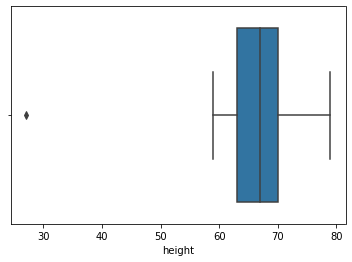

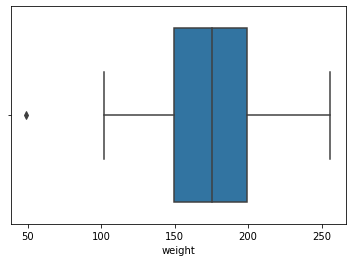

In [1165]:
sns.boxplot(patients_copy['height'])
plt.show()
sns.boxplot(patients_copy['weight'])
plt.show()

In [1166]:
patients_copy[patients_copy['height']>78]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
418,419,male,Mahmud,Kadyrov,3390 Hidden Meadow Drive,Stanton,ND,58571,United States,MahmudKadyrov@gustr.com1 701 745 2700,1980-06-18,215.2,79,24.2


In [1167]:
patients_copy[patients_copy['height']<58]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,334-515-7487TimNeudorf@cuvox.de,1928-02-18,192.3,27,26.1


In [1168]:
patients_copy[patients_copy['weight']>252]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
118,119,male,Adib,Ghanem,3457 Bridge Avenue,Delcambre,LA,70528,United States,337-685-4885AdibMutazzGhanem@fleckens.hu,1967-12-31,254.5,72,34.5
485,486,male,Trifon,Izmailov,3697 Drainer Avenue,Fort Walton Beach,FL,32548,United States,TrifonIzmailov@fleckens.hu1 850 659 0417,1973-02-15,255.9,74,32.9


In [1169]:
patients_copy[patients_copy['weight']<100]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691,United States,330-202-2145CamillaZaitseva@superrito.com,1938-11-26,48.8,63,19.1


In [1170]:
mask1=patients_copy['height']>58

mask4=patients_copy['weight']<252
mask2=patients_copy['height']<78

mask3=patients_copy['weight']>100 


patients_copy=patients_copy[mask1 & mask2 & mask3 & mask4]

### Test

In [1171]:
patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,386-334-5237RafaelCardosoCosta@gustr.com,1931-08-31,183.9,70,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,03852,United States,207-477-0579MustafaLindstrom@jourrapide.com,1959-04-10,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1971-01-13,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,1952-02-13,176.9,67,27.7


In [1172]:
patients_copy

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,CA,92390,United States,951-719-9170ZoeWellish@superrito.com,1976-07-10,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,IL,61812,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,1967-04-03,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,NE,68467,United States,402-363-6804JaeMDebord@gustr.com,1980-02-19,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,07095,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,1951-07-26,220.9,70,31.7
5,6,male,Rafael,Costa,1140 Willis Avenue,Daytona Beach,FL,32114,United States,386-334-5237RafaelCardosoCosta@gustr.com,1931-08-31,183.9,70,26.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,03852,United States,207-477-0579MustafaLindstrom@jourrapide.com,1959-04-10,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341,United States,928-284-4492RumanBisliev@gustr.com,1948-03-26,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110,United States,816-223-6007JinkedeKeizer@teleworm.us,1971-01-13,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,1952-02-13,176.9,67,27.7


### Define

In [1173]:
# Inconsistent way of storing phone numbers in contact col[IC]

### Code

In [1174]:
phone_numbers=[]
emails=[]
for contact in patients_copy['contact']:
    try:
        match=re.findall(r'\d{3}-\d{3}-\d{4}',contact)[0]
        phone_numbers.append(match)
    except:
        try:
            match=re.findall(r'\d{3} \d{3} \d{4}',contact)[0]
            match='-'.join(match.split())
            phone_numbers.append(match)
        except:
            try:
                match=re.findall(r'\(\d{3}\) \d{3}-\d{4}',contact)[0]
                match1=re.findall(r'\(\d{3}\)',match)[0][1:4]
                match2=re.findall(r'\d{3}-\d{4}',match)[0]
                
                match=match1+'-'+match2
                phone_numbers.append(match)
            except:
                phone_numbers.append(np.nan)
    try:
        match=re.findall(r'[a-zA-Z][a-zA-Z0_9.-]+@[a-zA-Z0-9_.-]+\.[a-zA-Z]+',contact)[0]
        emails.append(match)
    except:
        emails.append(np.nan)


In [1175]:
patients_copy['emails']=emails
patients_copy['phone_numbers']=phone_numbers
patients_copy.drop(columns='contact',inplace=True)

### Test

In [1176]:
patients_copy.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,emails,phone_numbers
35,36,female,Kamila,Pecinová,3558 Longview Avenue,New York,New York,10004,United States,1985-12-23,198.9,62,36.4,KamilaPecinova@dayrep.com,718-501-0503
275,276,male,Eddie,Archer,2043 Jadewood Drive,Lombard,IL,60148,United States,1982-07-17,158.6,69,23.4,EddieAArcher@gustr.com,224-305-6805
53,54,male,Kwemtochukwu,Ogochukwu,2172 Lynn Street,Franklin,MA,02038,United States,1976-06-30,150.5,72,20.4,KwemtochukwuOgochukwu@einrot.com,617-317-5055
7,8,female,Xiuxiu,Chang,2687 Black Oak Hollow Road,Morgan Hill,CA,95037,United States,1958-08-13,158.0,60,30.9,XiuxiuChang@einrot.com,408-778-3236
359,360,female,Merci,Leroux,4519 Sussex Court,Copperas Cove,TX,76552,United States,1955-06-08,132.2,65,22.0,MerciLeroux@jourrapide.com,254-518-6365


### Define

In [1177]:
# Duplicate and not useful data in dataset[IC]

In [1178]:
mask1 = patients_copy['address'] != '123 Main Street'
mask2 = patients_copy['given_name']!='John'
patients_copy=patients_copy[mask1 & mask2]

### Test

In [1179]:
patients_copy[patients_copy['address'].duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,emails,phone_numbers
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771,United States,1985-08-01,155.8,67,24.4,JakobCJakobsen@einrot.com,845-858-7707
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,00nan,NaN,1978-04-09,237.8,69,35.1,NaN,NaN
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,00nan,NaN,1976-09-23,165.9,63,29.4,NaN,NaN
234,235,female,Martina,Tománková,NaN,NaN,NaN,00nan,NaN,1936-04-07,199.5,65,33.2,NaN,NaN
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,00nan,NaN,1951-10-30,146.5,69,21.6,NaN,NaN
257,258,male,Jin,Kung,NaN,NaN,NaN,00nan,NaN,1995-05-17,231.7,69,34.2,NaN,NaN
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,00nan,NaN,1989-11-03,158.6,63,28.1,NaN,NaN
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,00nan,NaN,1937-10-09,175.2,61,33.1,NaN,NaN
278,279,female,Generosa,Cabán,NaN,NaN,NaN,00nan,NaN,1962-12-16,124.3,69,18.4,NaN,NaN
282,283,female,Sandy,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,SandraCTaylor@dayrep.com,304-438-2648


## Cleaned Patients Data

In [1180]:
patients_copy.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,emails,phone_numbers
48,49,female,Annika,Vaara,4853 University Drive,Lombard,IL,60148,United States,1996-02-20,109.1,67,17.1,AnnikaVaara@rhyta.com,312-719-7238
283,284,male,Nwachukwu,Nebeolisa,2873 John Calvin Drive,Chicago,IL,60605,United States,1986-03-10,245.5,68,37.3,NwachukwuNebeolisa@cuvox.de,708-845-2053
120,121,female,Nicoline,Østergaard,2836 Boring Lane,San Francisco,CA,94108,United States,1926-12-14,124.5,63,22.1,NicolinePstergaard@superrito.com,415-676-8818
486,487,male,Samuel,Blix,3488 Clair Street,Waco,TX,76706,United States,1983-07-06,211.4,74,27.1,SamuelBlix@dayrep.com,254-681-4504
173,174,female,Marija,Grubišić,954 Summit Park Avenue,Auburn Hills,MI,48057,United States,1985-12-28,155.1,69,22.9,MarijaGrubisic@cuvox.de,248-944-0932


### Tidiness

#### `Patients`

- Phone and email together in one col i.e. contact

#### `Treatments`

- 3 variables stored in auralin and novodra cols

#### `Adverse Reactions`

- No point of using this table


# Cleaning Data

You should follow the order provided below:

- Completeness Issues
- Tidiness Issues
- Remaining Data quality issues like validity, accuracy and consistency

### Steps involved in Data cleaning

- Define
- Code 
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

## a. Completeness Issues

- Missing values for contact details of 12 patients
- Only 280 rows are there, instead of 350
- hba1c_change col has missing values

#### Define

In [1181]:
# Subtract hba1c_start from hba1c_end to get hba1c_change

#### Code

In [1216]:
treatment_copy['hba1c_change']=treatment_copy['hba1c_start']-treatment_copy['hba1c_end']

#### Test

In [1217]:
treatment_copy

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,0.32
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


## b. Tidiness Issues

- Phone + email in contact col `patients`
- Novodra and Aurolin col `treatment`
- Merge the `adverse` table to `treatment` table

#### Define

In [1184]:
# Novodra and Aurolin using the melt function

#### Code

In [1185]:
treatment_copy=pd.melt(treatment_copy, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')

In [1186]:
treatment_copy=treatment_copy[treatment_copy['dose']!='-']

In [1187]:
treatment_copy['start'],treatment_copy['end']=treatment_copy['dose'].str.split('-').str

In [1188]:
treatment_copy.drop(columns={'dose'}, inplace=True)

#### Test

In [1189]:
treatment_copy.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


### Define


In [1190]:
# Subtract hba1c_start from hba1c_end to get hba1c_change in treatment_cut dataset

### Code

In [1191]:
treatment_cut_copy['hba1c_change']=treatment_cut_copy['hba1c_start']-treatment_cut_copy['hba1c_end']

### Test

In [1192]:
treatment_cut_copy.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
50,timothy,cotton,-,26u - 25u,7.92,7.52,0.40
47,regolo,nucci,51u - 59u,-,7.53,7.02,0.51
63,žarka,rap,35u - 48u,-,7.54,7.15,0.39
18,flavia,fiorentino,46u - 57u,-,7.95,7.60,0.35
67,bernd,schneider,48u - 56u,-,7.74,7.44,0.30


### Define

In [1193]:
# Novodra and Aurolin using the melt function in treatment cut dataset

### Code

In [1194]:
treatment_cut_copy=pd.melt(treatment_cut_copy, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')

In [1195]:
treatment_cut_copy=treatment_cut_copy[treatment_cut_copy['dose']!='-']

In [1196]:
treatment_cut_copy['start'],treatment_cut_copy['end']=treatment_cut_copy['dose'].str.split('-').str

In [1197]:
treatment_cut_copy.drop(columns={'dose'}, inplace=True)

### Test

In [1198]:
treatment_cut_copy

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end
0,jožka,resanovič,7.56,7.22,0.34,auralin,22u,30u
1,inunnguaq,heilmann,7.85,7.45,0.40,auralin,57u,67u
2,alwin,svensson,7.78,7.34,0.44,auralin,36u,39u
4,amanda,ribeiro,7.85,7.47,0.38,auralin,36u,44u
6,sara,miles,7.53,7.12,0.41,auralin,30u,35u
...,...,...,...,...,...,...,...,...
128,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u
130,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u
134,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u
136,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u


### Define

In [1199]:
### only 280 columns instead of 350

In [1200]:
### Merge the treatment_cut column with treatment

### Code

In [1201]:
treatment_copy = pd.concat([treatment_copy,treatment_cut_copy],axis=0,ignore_index=True)



### Test

In [1202]:
treatment_copy

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u
...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u


### Define

In [1203]:
## No need of separate table for adverse reaction

### Code

In [1204]:
treatment_copy = pd.merge(treatment_copy,adverse_copy, on = ['given_name','surname'],how='left')



### Test

In [1205]:
treatment_copy

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


### Define

In [1206]:
##Name and surname col is in lower case[IC]

### Code

In [1207]:
l = []
for i in treatment_copy['given_name']:
    l.append(i.title())
treatment_copy['given_name'] = l
l = []
for i in treatment_copy['surname']:
    l.append(i.title())

treatment_copy['surname'] = l



### Test

In [1208]:
treatment_copy.head(2)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,Skye,Gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN


### Final cleaning

In [1209]:
treatment_copy[treatment_copy['given_name']=='Joseph']

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
5,Joseph,Day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
62,Joseph,Day,7.70,7.19,0.51,auralin,29u,36u,hypoglycemia
310,Joseph,Tucker,7.67,7.30,0.37,auralin,48u,56u,NaN


In [1210]:
treatment_copy.drop_duplicates(inplace=True)

In [1211]:
treatment_copy

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start,end,adverse_reaction
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,Skye,Gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,Sophia,Haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,Eddie,Archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,Asia,Woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,Christopher,Woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,Maret,Sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,Lixue,Hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,Jakob,Jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


### What is Assessing Data?

The data analysis process consists of the following steps

1. Asking Questions
2. Data Wrangling<br><br>
    a. Gathering Data
            i.   CSV files
            ii.  APIs
            iii. Web Scraping
            iv.  Databases
    b. <b>Assessing Data</b><br>
    c. Cleaning Data<br><br>
3. Exploratory Data Analysis
4. Drawing Conclusion
5. Comunicating Results
    

### Assessing Data

In this step, the data is to be understood more deeply. Before implementing methods to clean it, you will definitely need to have a better idea about what the data is about.

### Types of Unclean Data

There are 2 kinds of unclean data

1. <u>Dirty Data</u> (Data with Quality issues):<br>
    Dirty data, also known as low quality data. Low quality data has content issues.<br>
2. <u>Messy Data</u> (Data with tidiness issues)<br>
    Messy data, also known as untidy data. Untidy data has structural issues.

### 1. Dirty Data

When the data has following kinds of issues:

1. Duplicated data
2. Missing Data
3. Corrupt Data
4. Inaccurate Data

This kind of data is known as Dirty data

### 2. Messy Data

When the data has structural issue is it known as Messy or untidy data.

Tidy data has the following properties:

1. Each variable forms a column
2. Each observation forms a row
3. Each observational unit forms a table

If a data violates any one of the above it is known as untidy data

Example:

<img src="untidy.png">

### Types of Assessment

There are 2 types of assessment styles

1. Manual - Looking through the data manually in google sheets
2. Programmatic - By using pandas functions such as info(), describe() or sample()

### Steps in Assessment

There are 2 steps involved in Assessment

1. Discover
2. Document

### Data Quality Dimensions

1. Completeness Issues
2. Validity Issues
3. Accuracy Issues
4. Consistency Issues